In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.interpolate import interp1d

In [2]:
models = ['ref','f=0.999','f=0.1','f=0.01','f=0.003']

k = 0.1

cosmo={}
for M in models:
    cosmo[M] = Class()
    cosmo[M].set({'gauge':'synchronous',
                  'output_newtonian':'no',
                  'output':'tCl, mPk',
                  'omega_cdm':0.12038,
                  'k_output_values':k,
                  #'z_reio':11.357,
                  #'reionization_z_start_max':750,
                  #'z_reiomod_start':300,
                  #'recfast_Nz0':80000,
                  #'recfast_z_initial':1e7,
                  'recombination':'recfast',
                  #'recfast_H_frac':3e-4,
                  'reio_parametrization':'reio_none',
                  'start_sources_at_tau_c_over_tau_h':2e-3,
                  #'100*theta_s':1.042143,
                  #'background_verbose':5,
                  #'input_verbose':5,
                  #'h':0.47556
                  'tight_coupling_trigger_tau_c_over_tau_h':0.008,
                  'tight_coupling_trigger_tau_c_over_tau_k':0.001,
                 })
    if M != 'ref':
        cosmo[M].set({'a_bidm':5e-4,
                      'A_bidm':1.7e-41,
                      'm_bidm':1,
                      'n_bidm':-4,
                      'bidm_type':'powerlaw'})
    if M == 'f=0.999':
        cosmo[M].set({'f_bidm':0.999})
    if M == 'f=0.1':
        cosmo[M].set({'f_bidm':0.1})
    if M == 'f=0.01':
        cosmo[M].set({'f_bidm':0.01})
    if M == 'f=0.003':
        cosmo[M].set({'f_bidm':0.003})
    cosmo[M].compute()
    print([M])

['ref']
['f=0.999']
['f=0.1']
['f=0.01']
['f=0.003']


In [3]:
all_k ={}
one_k ={}
for M in models:
    all_k[M] = cosmo[M].get_perturbations()
    one_k[M] = all_k[M]['scalar'][0] 

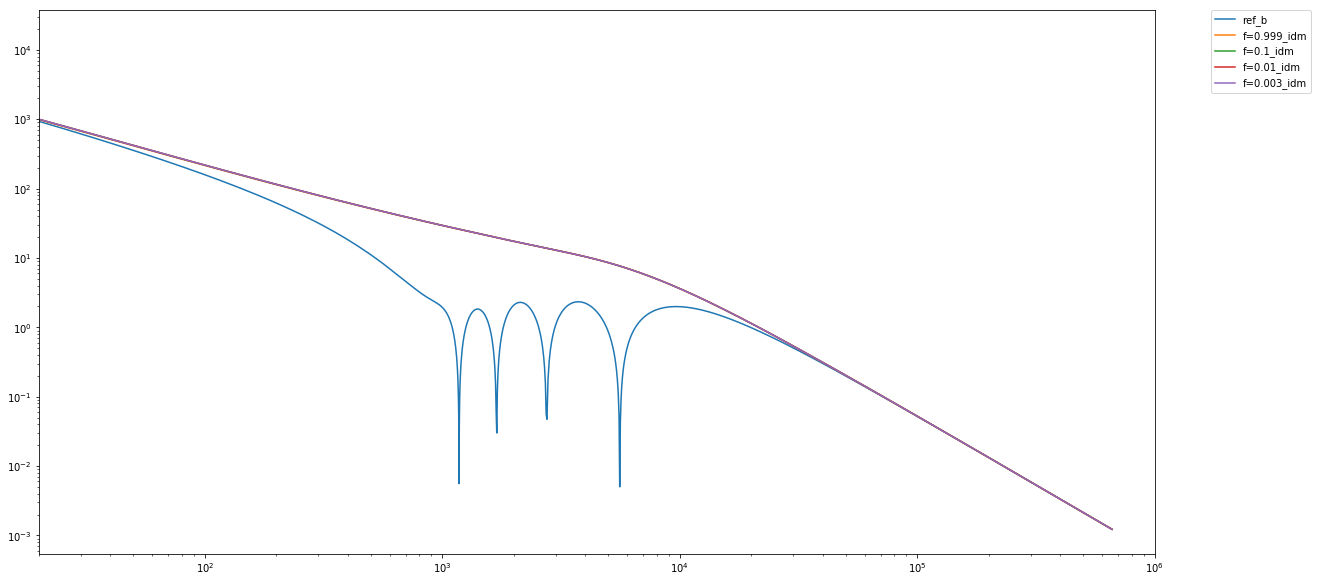

In [4]:
plt.figure(figsize = (20,10))
for M in models:
    tau = one_k[M]['tau [Mpc]']
    a = one_k[M]['a']
    z = 1/a -1
    delta_b = abs(one_k[M]['delta_b'])
    delta_g = abs(one_k[M]['delta_g'])
    #plt.loglog(z,delta_b,label=M + '_b')
    if M == 'ref':
        plt.loglog(z,delta_b,label=M + '_b')
    #plt.loglog(a,delta_g,label=M + '_g')
    if M != 'ref':
        delta_idm = abs(one_k[M]['delta_bidm'])
        plt.loglog(z,delta_idm,label=M + '_idm')
plt.xlim([20,1e6])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

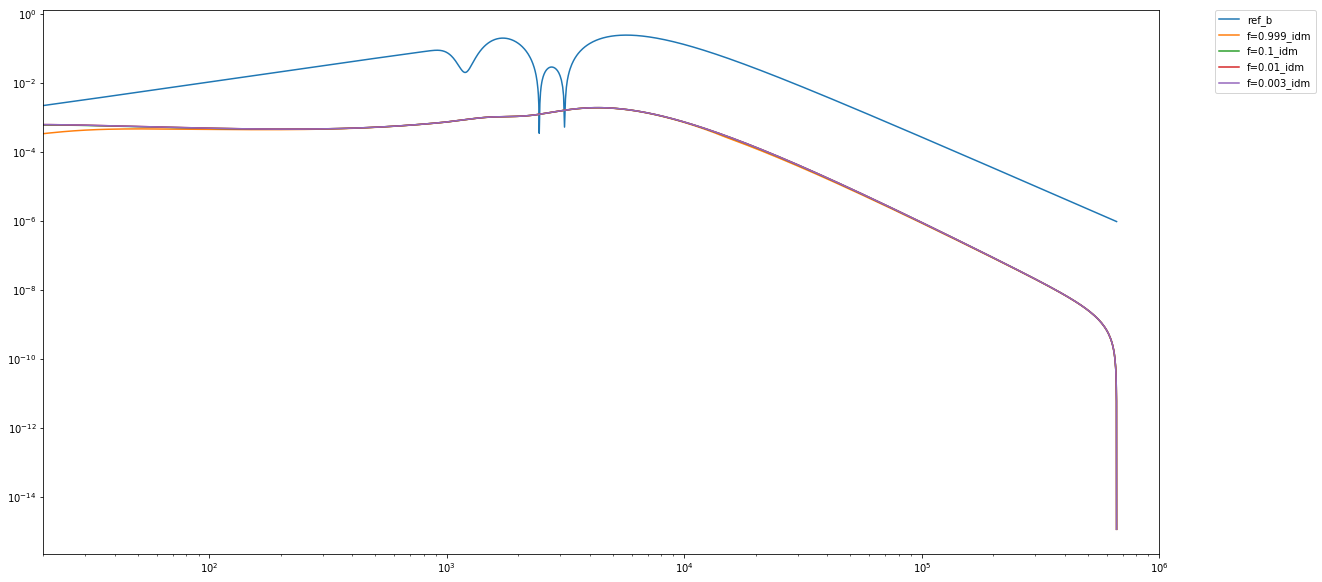

In [5]:
plt.figure(figsize = (20,10))
for M in models:
    tau = one_k[M]['tau [Mpc]']
    a = one_k[M]['a']
    z = 1/a -1
    theta_b = abs(one_k[M]['theta_b'])
    theta_g = abs(one_k[M]['theta_g'])
    if M == 'ref':
        plt.loglog(z,theta_b,label=M + '_b')
    #plt.loglog(a,theta_g,label=M + '_g')
    if M != 'ref':
        theta_idm = abs(one_k[M]['theta_bidm'])
        plt.loglog(z,theta_idm,label=M + '_idm')
plt.xlim([20,1e6])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

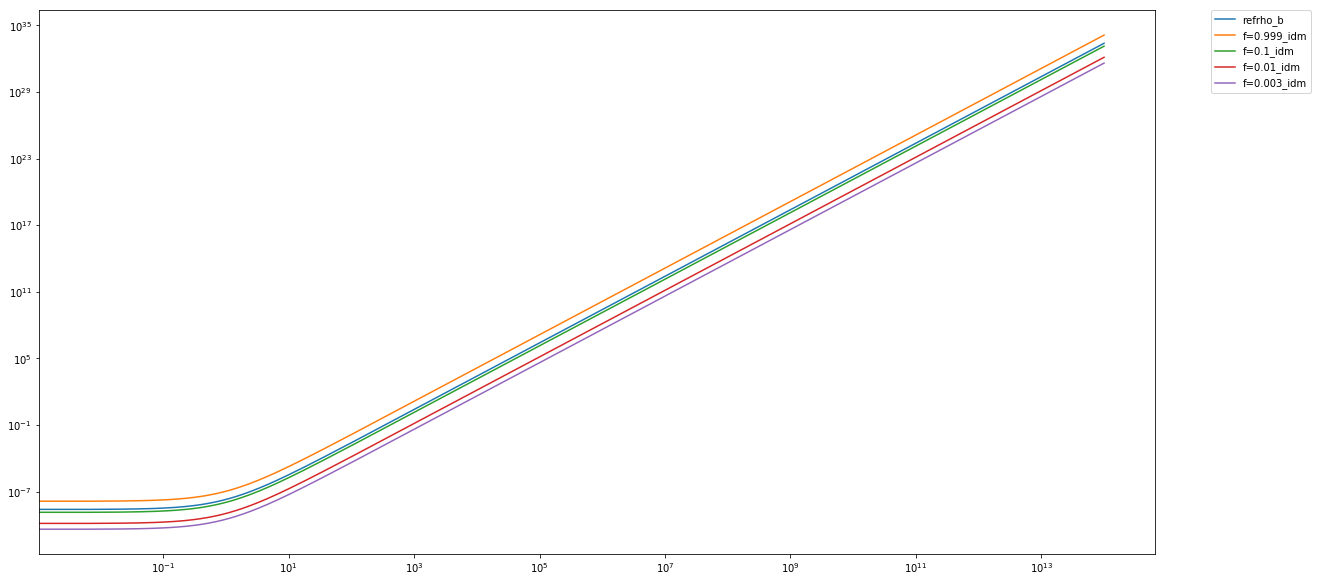

In [9]:
plt.figure(figsize = (20,10))
for M in models:
    bg = cosmo[M].get_background()
    z = bg['z']
    if M == 'ref':
        rho_b = bg['(.)rho_b']
        plt.loglog(z,rho_b,label=M + 'rho_b')
    #plt.loglog(a,theta_g,label=M + '_g')
    if M != 'ref':
        rho_bidm = bg['(.)rho_bidm']
        plt.loglog(z,rho_bidm,label=M + '_idm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)